In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv("data/rev ios t11 t12.csv")
df.head()

,event_date,advertising_id,product_id,rev
0,2019-11-01,27677BC8-1837-42BE-9F2E-58E9BB14A2D6,com.zitga.ninja.stickman.legends.event_shop_cs...,12.233904
1,2019-11-01,EFBD0208-EE9B-4AB6-982E-A1D7C5ACB04E,com.zitga.ninja.stickman.legends.character_raven,9.990000
2,2019-11-01,0614B442-7A68-4CBC-B3B6-406CFA2AB5E2,com.zitga.ninja.stickman.legends.limited_saleo...,5.640039
3,2019-11-01,65FE1944-D547-4F3B-AC37-D9803F5B09FF,com.zitga.ninja.stickman.legends.advance_mage,9.990000
4,2019-11-01,65FE1944-D547-4F3B-AC37-D9803F5B09FF,com.zitga.ninja.stickman.legends.advance_hason_1,9.990000


In [11]:
df["event_date"] = pd.to_datetime(df.event_date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16977 entries, 0 to 16976
Data columns (total 4 columns):
event_date        16977 non-null datetime64[ns]
advertising_id    3162 non-null object
product_id        16977 non-null object
rev               16977 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 530.7+ KB


In [31]:
df.advertising_id.fillna("None", inplace = True)

In [8]:
df.describe()

,rev
count,16977.000000
mean,14.111270
std,18.429651
min,0.852336
25%,4.990000
50%,9.990000
75%,13.246653
max,110.250983


In [32]:
df11 = df[(df.event_date >= pd.to_datetime("2019-11-01")) & (df.event_date <= pd.to_datetime("2019-11-30"))]

In [63]:
df_cus = pd.DataFrame(df11.groupby(["advertising_id", "event_date"]).rev.sum())
df_cus

rev
advertising_id                       event_date               
008D6CD0-615F-4A96-9095-0C54A3544B15 2019-11-02       8.264356
                                     2019-11-04      10.357554
                                     2019-11-05       4.138876
01C4BFEA-6B8E-43DF-8EA7-367E056EEA41 2019-11-11      11.735929
01F0826D-26F8-4905-8164-EADAC611E7AC 2019-11-10       9.990000
...                                                        ...
None                                 2019-11-26      55.205792
                                     2019-11-27      43.941702
                                     2019-11-28     161.486008
                                     2019-11-29    1038.661959
                                     2019-11-30  120421.982848

[636 rows x 1 columns]

In [64]:
df_cus.sort_values(by = "rev", ascending = False)

rev
advertising_id                       event_date               
None                                 2019-11-30  120421.982848
2044ED00-20BE-4FA2-A307-8832F1C60406 2019-11-24   19976.512654
                                     2019-11-22    8621.873707
None                                 2019-11-01    7744.976510
2044ED00-20BE-4FA2-A307-8832F1C60406 2019-11-23    6092.039341
...                                                        ...
D328FA8F-A490-496B-8502-FABCF90FCC0B 2019-11-01       0.948194
7965BDCF-CEE4-4E88-BB29-E0B5C388DC3B 2019-11-17       0.948153
88F5C856-5E9B-46A0-B332-6BC3979FAE50 2019-11-30       0.948145
2500EB25-E369-4BF2-BFC3-6E12787BE232 2019-11-20       0.948072
58DC905E-0D25-4CBC-AB44-1201225EAD4C 2019-11-16       0.938588

[636 rows x 1 columns]

In [29]:
df11.rev.sum()

204780.04841999998

In [30]:
df_cus.rev.sum()

73909.21521499976

In [35]:
73909 - 36168 - 27789

9952

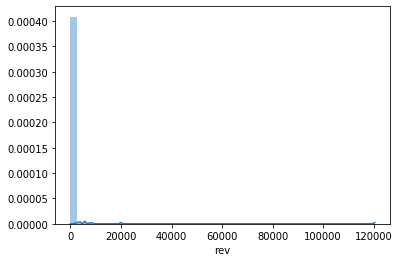

In [65]:
sns.distplot(df_cus.rev, kde = True)
# sns.despine()

In [41]:
print(("Skewness: {}").format(df_cus.rev.skew()))
print(("Kurtosis: {}").format(df_cus.rev.kurt()))

Skewness: 16.967650847248105
Kurtosis: 306.2558381266613


In [44]:
from sklearn.ensemble import IsolationForest

In [66]:
iso = IsolationForest(behaviour = "new", contamination = "auto")
iso.fit(df_cus[["rev"]])

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

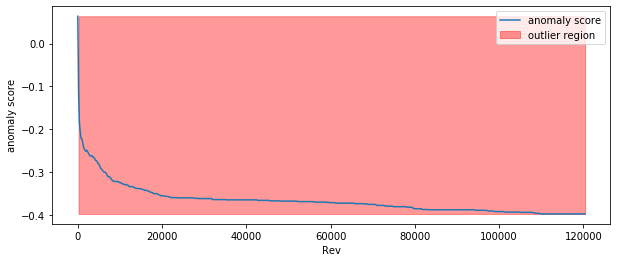

In [67]:
xx = np.linspace(df_cus['rev'].min(), df_cus['rev'].max(), len(df_cus)).reshape(-1,1)
anomaly_score = iso.decision_function(xx)
outlier = iso.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Rev')
plt.show()

In [68]:
outlier

array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [69]:
anomaly_score

array([ 0.0634639 , -0.11748901, -0.18429481, -0.20497239, -0.22074652,
       -0.22172247, -0.22957783, -0.23951738, -0.24554599, -0.24807239,
       -0.25111537, -0.2485787 , -0.25111537, -0.25468117, -0.25775104,
       -0.26134834, -0.26186363, -0.26134834, -0.26134834, -0.26496272,
       -0.26496272, -0.26755492, -0.27172072, -0.2727657 , -0.27433582,
       -0.27853842, -0.28064827, -0.28276383, -0.28807786, -0.29128358,
       -0.29342797, -0.29557817, -0.29827411, -0.2988144 , -0.29989606,
       -0.30097919, -0.30369344, -0.30805538, -0.31024521, -0.3096972 ,
       -0.31134236, -0.31244099, -0.3168504 , -0.31795649, -0.32072827,
       -0.32072827, -0.32072827, -0.32128375, -0.32128375, -0.32128375,
       -0.3218396 , -0.3218396 , -0.32350943, -0.3240668 , -0.3240668 ,
       -0.32630003, -0.32630003, -0.32741891, -0.32853931, -0.32853931,
       -0.32853931, -0.32853931, -0.33022275, -0.33022275, -0.3330361 ,
       -0.3330361 , -0.3330361 , -0.3330361 , -0.3330361 , -0.33